<a href="https://colab.research.google.com/github/shubhahegde2002/Prediction-of-LC50-value-QSAR-models-/blob/main/QSAR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('/content/qsar_fish_toxicity.csv')

In [3]:
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.26,0.83,1.68,0,1,1.45,3.77
1,2.19,0.58,0.86,0,0,1.35,3.12
2,2.13,0.64,0.83,0,0,1.35,3.53
3,3.03,0.33,1.47,1,0,1.81,3.51
4,2.09,0.83,0.86,0,0,1.89,5.39


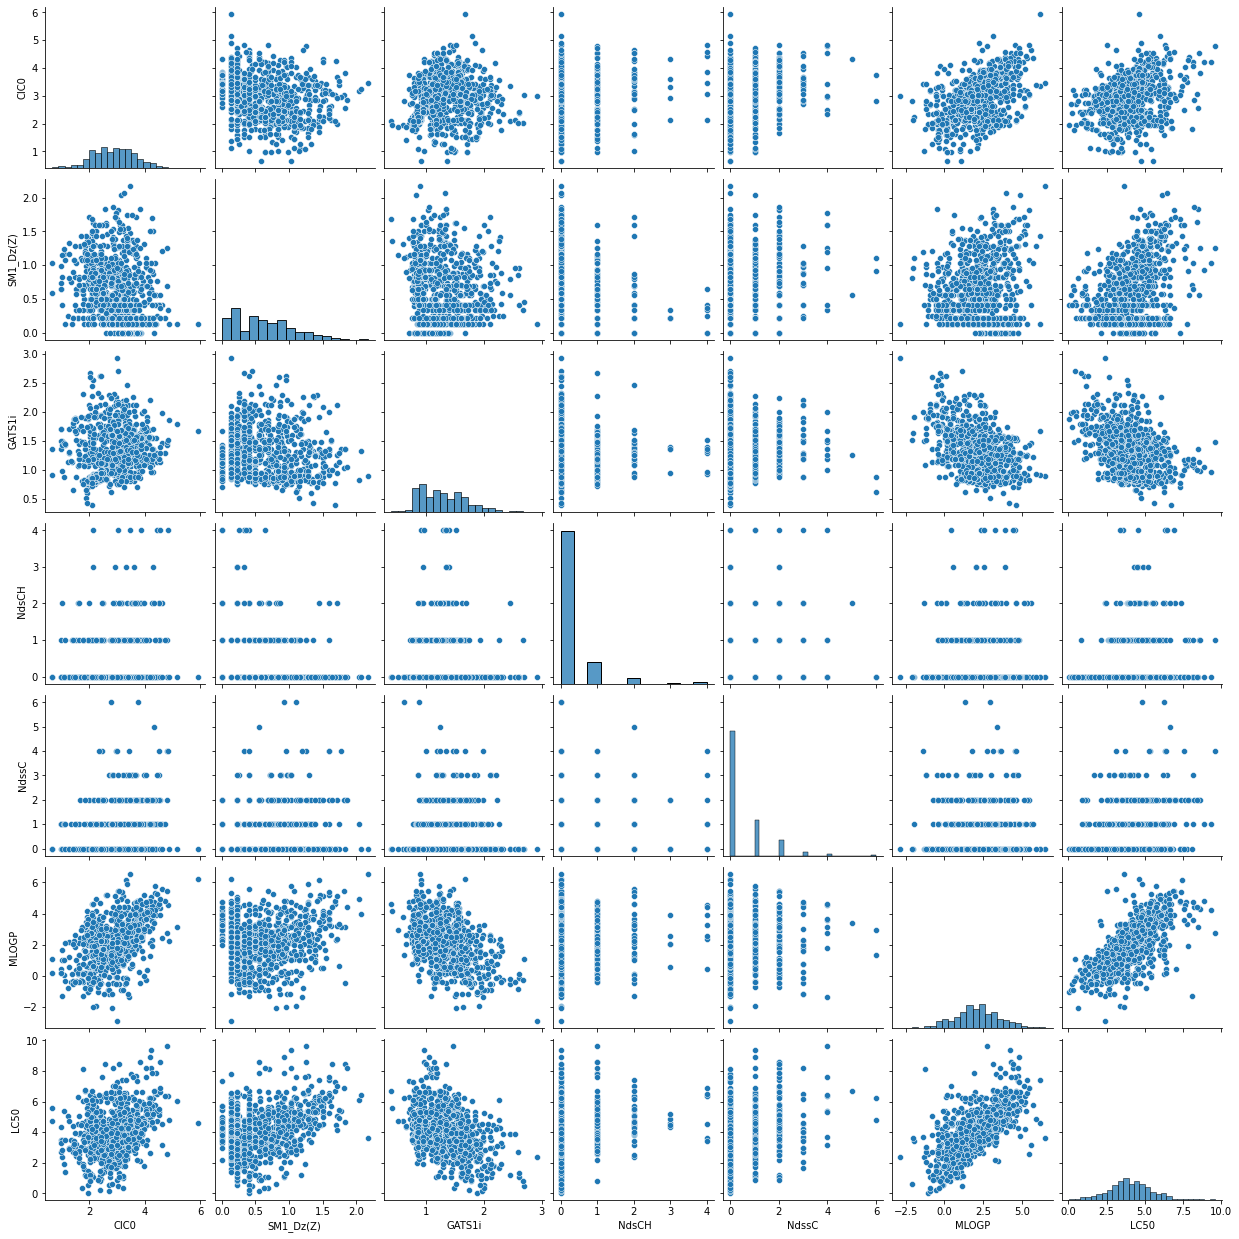

In [4]:
sns.pairplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


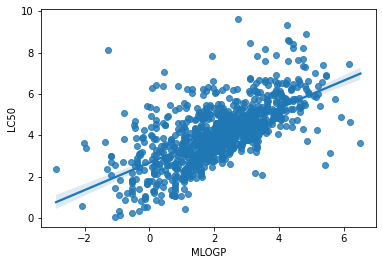

In [5]:
sns.regplot(df['MLOGP'],df['LC50'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


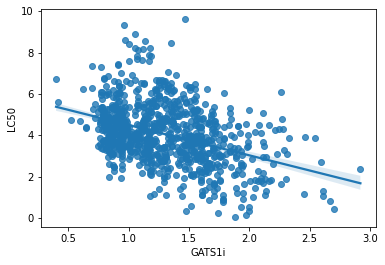

In [6]:
sns.regplot(df['GATS1i'],df['LC50'])

In [7]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898789,0.628238,1.294053,0.229075,0.485683,2.109714,4.064923
std,0.756082,0.429321,0.394419,0.605335,0.861279,1.433275,1.455571
min,0.670000,0.000000,0.400000,0.000000,0.000000,-2.880000,0.050000
25%,2.347500,0.220000,0.950000,0.000000,0.000000,1.210000,3.150000
50%,2.935000,0.570000,1.240000,0.000000,0.000000,2.130000,3.985000
75%,3.410000,0.892500,1.560000,0.000000,1.000000,3.110000,4.910000
max,5.930000,2.170000,2.920000,4.000000,6.000000,6.520000,9.610000


In [8]:
df.corr(method='pearson')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235702,0.147277,0.121271,0.246521,0.463996,0.291901
SM1_Dz(Z),-0.235702,1.000000,-0.146012,-0.140906,0.163449,0.200302,0.410675
GATS1i,0.147277,-0.146012,1.000000,-0.010635,0.093059,-0.450725,-0.397858
NdsCH,0.121271,-0.140906,-0.010635,1.000000,0.188164,0.048530,0.171962
NdssC,0.246521,0.163449,0.093059,0.188164,1.000000,0.028550,0.172391
MLOGP,0.463996,0.200302,-0.450725,0.048530,0.028550,1.000000,0.651517
LC50,0.291901,0.410675,-0.397858,0.171962,0.172391,0.651517,1.000000


LC50 has high positive correlation with MLOGP, positive correlation with SM1_Dz(Z), high negative correlation with GATS1i, and small positive correlation with the rest 


In [9]:
X = df.iloc[:, :6].values
y=df.iloc[:,6].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use('fivethirtyeight')

**K-Nearest Neighbor(KNN)**

In [11]:
def KNN():
  return 0

In [12]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

In [14]:
start_time=time.time()
knn_pred=[]
for k in range(2,10):
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  knn_pred.append(knn.score(X_train,y_train))
  print("R Squared for k: ", k," is ",knn.score(X_train,y_train))



R Squared for k:  2  is  0.8585094888132218
R Squared for k:  3  is  0.8162555551627639
R Squared for k:  4  is  0.7866812237535517
R Squared for k:  5  is  0.764558285171942
R Squared for k:  6  is  0.7425136484073716
R Squared for k:  7  is  0.7403811625114959
R Squared for k:  8  is  0.7299641035812935
R Squared for k:  9  is  0.7231626066812549


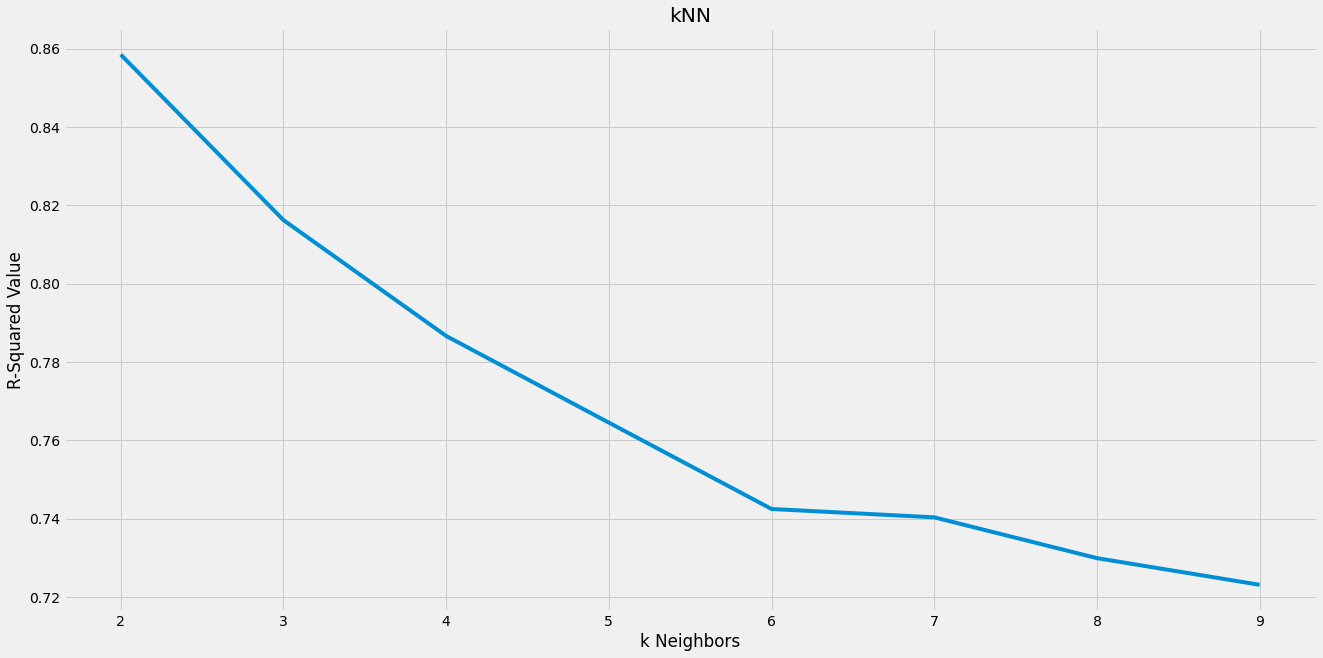

In [15]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(2, 10)], knn_pred)
plt.xlabel('k Neighbors')
plt.ylabel('R-Squared Value')
plt.title('kNN')
plt.show()

In [16]:
knn=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
training_time_knn=time.time()-start_time
knn_train_predictions=knn.predict(X_train)
knn_train_rscore = knn.score(X_train,y_train) 
knn_train_rmse=np.sqrt(mean_squared_error(y_train,knn_train_predictions))

print(training_time_knn)

0.4449474811553955


Every estimator or model in Scikit-learn has a score method after being trained on the data, usually X_train, y_train.

When you call **score** on classifiers like LogisticRegression, RandomForestClassifier, etc. the method computes the accuracy score by default. By default, the score method does not need the actual predictions.

When using accuracy_score you need ready predictions, i.e. the function does not generate prediction using the test set under the hood.

In [17]:
print("R squared for Training data: ", knn_train_rscore)
print("Root Mean Squared Error for Training data: ", knn_train_rmse)

R squared for Training data:  0.8585094888132218
Root Mean Squared Error for Training data:  0.5397790908715795


In [18]:
start_time2=time.time()
knn_test_predictions=knn.predict(X_test)
testing_time_knn=time.time()-start_time2
knn_test_rscore=knn.score(X_test,y_test)
knn_test_rmse=np.sqrt(mean_squared_error(y_test, knn_test_predictions))
knn_test_mae = mean_absolute_error(y_test, knn_test_predictions)
print(testing_time_knn)

0.0033140182495117188


In [19]:
print("R squared for Testing data: ", knn_test_rscore)
print("Root Mean Squared Error for Testing data: ", knn_test_rmse)
print("Mean Absolute Error for Testing data: ", knn_test_mae)


R squared for Testing data:  0.5050282712773373
Root Mean Squared Error for Testing data:  1.071169382569277
Mean Absolute Error for Testing data:  0.7698901098901099


In [20]:
def KNN():
  return {'Regressor Model':'KNN',
          'Predictions':knn_test_predictions,
          'R Squared': knn_test_rscore,
          'Mean Absolute Error':knn_test_mae,
          'Root Mean Squared Error':knn_test_rmse,
          'Training Time': training_time_knn,
          'Prediction Time':testing_time_knn}


In [21]:
def test(n):
    x=knn.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

1000 loops, best of 5: 496 µs per loop


In [22]:
def value(n):
    x=knn.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

4.97

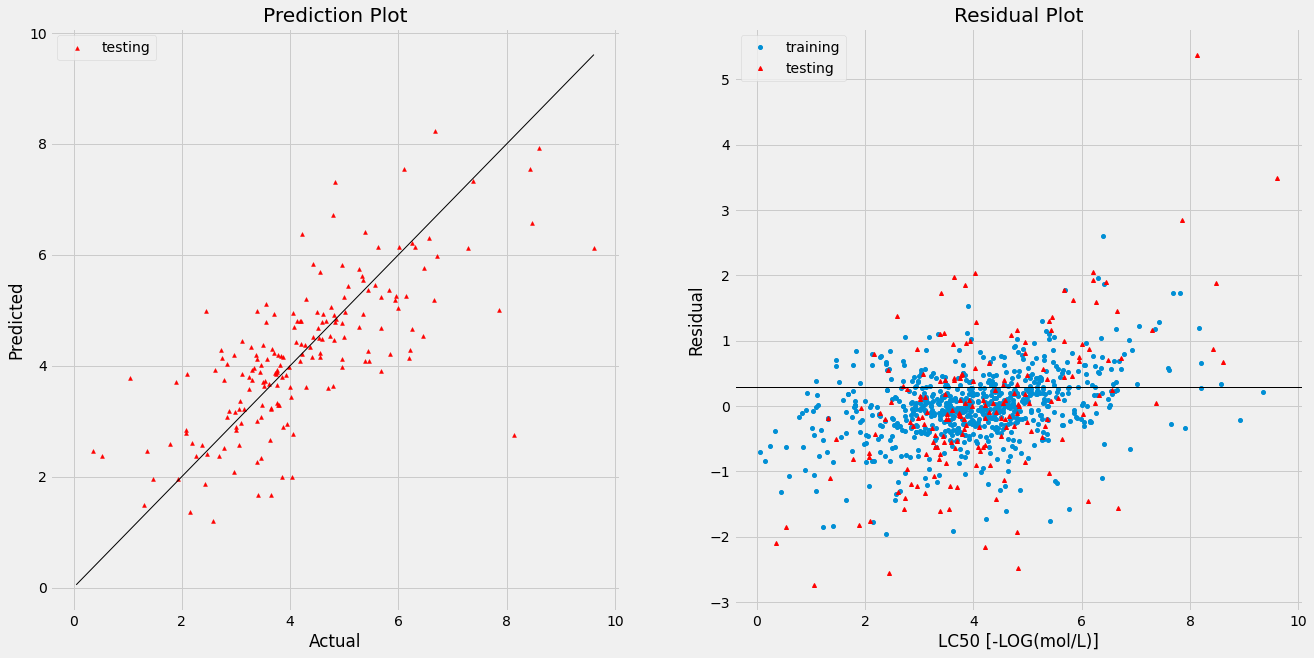

In [23]:
residual_train = y_train - knn_train_predictions
residual_test = y_test - knn_test_predictions

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, knn_train_predictions, s=15, label='training')
ax1.scatter(y_test, knn_test_predictions, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

**MULTIPLE LINEAR REGRESSION**

In [24]:
X=df.iloc[:,:-1].values
y=df.iloc[:,6].values

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=22)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
start_time=time.time()
mlr=LinearRegression()
mlr.fit(X_train,y_train)
training_time_mlr=time.time()-start_time

In [28]:
mlr_train_rscore=mlr.score(X_train,y_train)
mlr_train_pred=mlr.predict(X_train)
mlr_train_rmse=np.sqrt(mean_squared_error(y_train,mlr_train_pred))

In [29]:
print("R squared for Training data: ", mlr_train_rscore)
print("Root Mean Squared Error for Training data: ", mlr_train_rmse)

R squared for Training data:  0.5918190790531901
Root Mean Squared Error for Training data:  0.9314021289100801


In [30]:
import timeit

In [31]:
mlr_test_rscore=mlr.score(X_test,y_test)
start_time2=time.time()
mlr_test_pred=mlr.predict(X_test)
testing_time_mlr=time.time()-start_time2
mlr_test_rmse=np.sqrt(mean_squared_error(y_test,mlr_test_pred))
mlr_test_mae=mean_absolute_error(y_test,mlr_test_pred)

In [32]:
print("R squared for Testing data: ", mlr_test_rscore)
print("Root Mean Squared Error for Testing data: ", mlr_test_rmse)
print("Mean Absolute Error for Testing data: ", mlr_test_mae)

R squared for Testing data:  0.5136215283077674
Root Mean Squared Error for Testing data:  1.005928746601706
Mean Absolute Error for Testing data:  0.670218189775187


In [33]:
def MLR():
  return {'Regressor Model':'Multiple Linear Regression',
          'Predictions':mlr_test_pred,
          'R Squared': mlr_test_rscore,
          'Mean Absolute Error':mlr_test_mae,
          'Root Mean Squared Error':mlr_test_rmse,
          'Training Time': training_time_mlr,
          'Prediction Time':testing_time_mlr}

In [34]:
def test(n):
    x=mlr.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

The slowest run took 6.78 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 58.2 µs per loop


In [35]:
def value(n):
    x=mlr.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

3.9368946495999646

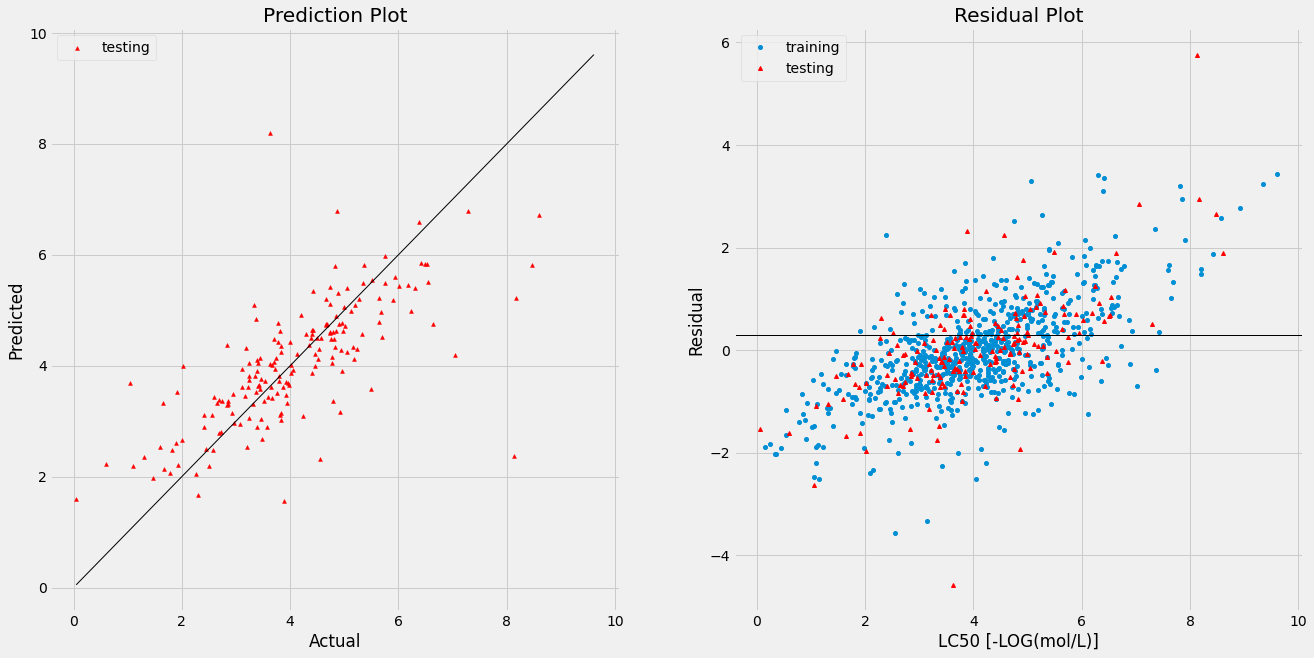

In [36]:
residual_train = y_train - mlr_train_pred
residual_test = y_test - mlr_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, mlr_train_pred, s=15, label='training')
ax1.scatter(y_test, mlr_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

Thus, as seen from the accuracy metrics and residual plots , MLR performs better than K-Nearest Neighbors, predicting LC50 value for input molecular descriptors 1.4 microseconds faster

**XGBOOST**

In [37]:
import xgboost

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=33)

In [39]:
#Estimating optimum max_depth and n_estimators
start_time=time.time()
xgb_params=[]
depth=[1,3,6,9,12]
for d in depth:
  xgb=xgboost.XGBRegressor(objective ='reg:squarederror',max_depth=d).fit(X_train,y_train)
  xgb_params.append(xgb.score(X_train,y_train))
  print("R Squared value for max_depth ",d,"is ",xgb.score(X_train,y_train))
  p=xgb.predict(X_test)
  print("RMSE for testing max_depth ",d,"is ",np.sqrt(mean_squared_error(y_test,p)))

R Squared value for max_depth  1 is  0.6297600104106265
RMSE for testing max_depth  1 is  1.0177016747401686
R Squared value for max_depth  3 is  0.8109759292356477
RMSE for testing max_depth  3 is  0.9972207736972686
R Squared value for max_depth  6 is  0.943215437280497
RMSE for testing max_depth  6 is  1.0224179078485174
R Squared value for max_depth  9 is  0.985156427578004
RMSE for testing max_depth  9 is  1.0849257211968852
R Squared value for max_depth  12 is  0.9910031118066027
RMSE for testing max_depth  12 is  1.068656378796123


In [40]:
xgb_p=xgboost.XGBRegressor(objective='reg:squarederror',max_depth=2).fit(X_train,y_train)
training_time_xgb=time.time()-start_time

In [41]:
xgb_p_train_rscore=xgb_p.score(X_train,y_train)
start_time2=time.time()
xgb_p_train_pred=xgb_p.predict(X_train)
testing_time_xgb=time.time()-start_time2
xgb_p_train_rmse=np.sqrt(mean_squared_error(y_train,xgb_p_train_pred))

In [42]:
print("R squared for Training data: ", xgb_p_train_rscore)
print("Root Mean Squared Error for Training data: ", xgb_p_train_rmse)

R squared for Training data:  0.7330586979043557
Root Mean Squared Error for Training data:  0.7319592964295943


In [43]:
xgb_p_test_rscore=xgb_p.score(X_test,y_test)
start_time2=time.time()
xgb_p_test_pred=xgb_p.predict(X_test)
testing_time=time.time()-start_time2
xgb_p_test_rmse=np.sqrt(mean_squared_error(y_test,xgb_p_test_pred))
xgb_p_test_mae=mean_absolute_error(y_test,xgb_p_test_pred)

In [44]:
print("R squared for Testing data: ", xgb_p_test_rscore)
print("Root Mean Squared Error for Testing data: ", xgb_p_test_rmse)
print("Mean Absolute Error for Testing data: ", xgb_p_test_rmse)

R squared for Testing data:  0.617693341188889
Root Mean Squared Error for Testing data:  0.9862926241610305
Mean Absolute Error for Testing data:  0.9862926241610305


In [45]:
def XGB():
  return {'Regressor Model':'XGBoost',
          'Predictions':xgb_p_test_pred,
          'R Squared': xgb_p_test_rscore,
          'Mean Absolute Error':xgb_p_test_mae,
          'Root Mean Squared Error':xgb_p_test_rmse,
          'Training Time': training_time_xgb,
          'Prediction Time':testing_time_xgb}

In [46]:
def test(n):
    x=xgb_p.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

The slowest run took 19.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 315 µs per loop


In [47]:
def value(n):
    x=xgb_p.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

3.7068446

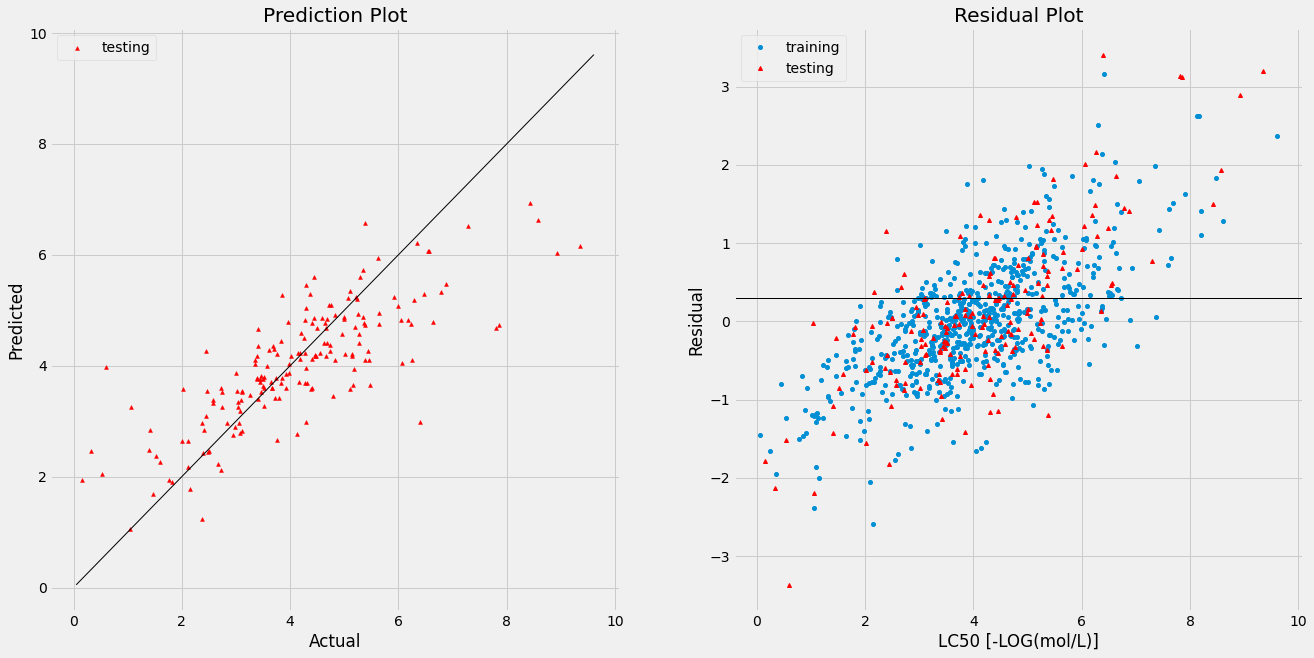

In [48]:
residual_train = y_train - xgb_p_train_pred
residual_test = y_test - xgb_p_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, xgb_p_train_pred, s=15, label='training')
ax1.scatter(y_test, xgb_p_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

XGBoost with optimum parameters: max_depth = 2. Best R Squared of 0.61 and Least RMSE of 0.98,

 But takes 409 microseconds per loop

**SVM Regressor**

In [49]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,shuffle=True, random_state=44)

In [52]:
start_time=time.time()
clf=svm.SVR(C=1,gamma=0.1)
clf.fit(X_train,y_train)
training_time_svm=time.time()-start_time


In [53]:
clf_train_rscore=clf.score(X_train,y_train)
clf_train_pred=clf.predict(X_train)
clf_train_rmse=np.sqrt(mean_squared_error(y_train,clf_train_pred))

In [54]:
print("R squared for Training data: ",clf_train_rscore)
print("Root Mean Squared Error for Training data: ", clf_train_rmse)

R squared for Training data:  0.6919621034597634
Root Mean Squared Error for Training data:  0.8041015948054063


In [55]:
clf_test_rscore=clf.score(X_test,y_test)
start_time2=time.time()
clf_test_pred=clf.predict(X_test)
testing_time_svm=time.time()-start_time2
clf_test_rmse=np.sqrt(mean_squared_error(y_test,clf_test_pred))
clf_test_mae=mean_absolute_error(y_test,clf_test_pred)

In [56]:
print("R squared for Testing data: ", clf_test_rscore)
print("Root Mean Squared Error for Testing data: ", clf_test_rmse)
print("Mean Absolute Error for Testing data: ", clf_test_mae)

R squared for Testing data:  0.5912428583106741
Root Mean Squared Error for Testing data:  0.9448805323325212
Mean Absolute Error for Testing data:  0.6403753016225677


In [57]:
def SVM():
  return {'Regressor Model':'SVM Regressor',
          'Predictions':clf_test_pred,
          'R Squared': clf_test_rscore,
          'Mean Absolute Error':clf_test_mae,
          'Root Mean Squared Error':clf_test_rmse,
          'Training Time': training_time_svm,
          'Prediction Time':testing_time_svm}

In [58]:
def test(n):
    x=clf.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

The slowest run took 5.09 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 146 µs per loop


In [59]:
def value(n):
    x=clf.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

5.48702931265635

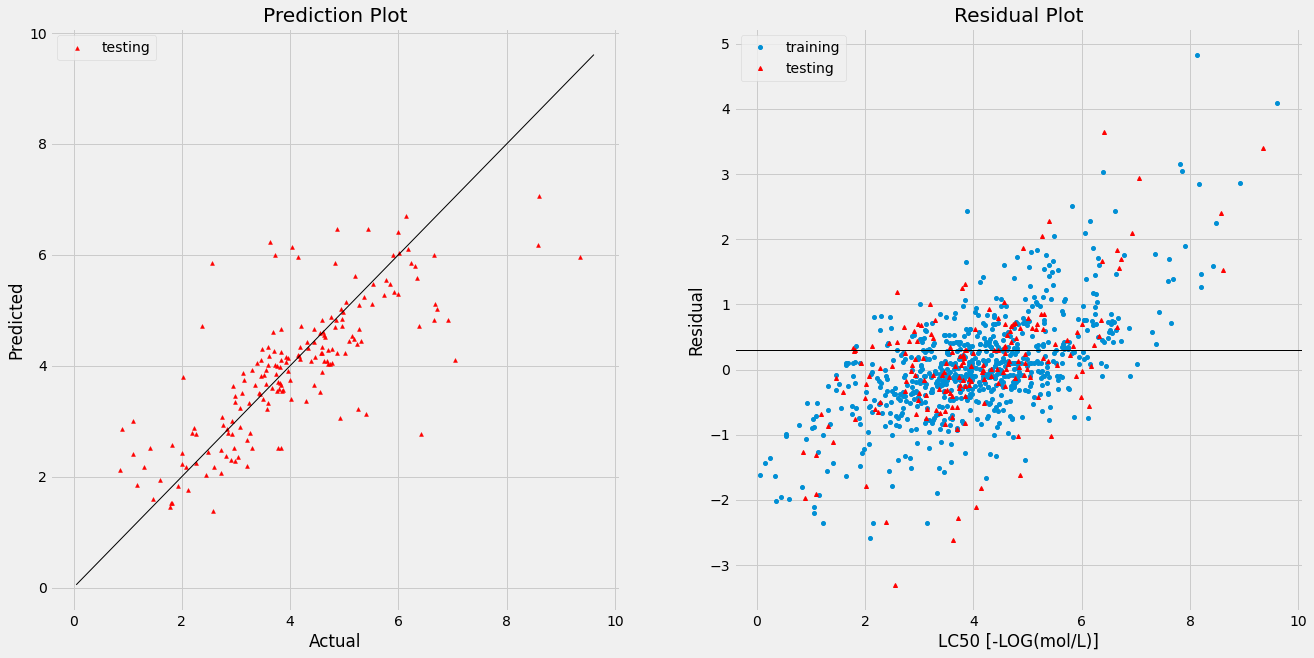

In [60]:
residual_train = y_train - clf_train_pred
residual_test = y_test - clf_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, clf_train_pred, s=15, label='training')
ax1.scatter(y_test, clf_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

**RANDOM FOREST**

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=66)

In [63]:
start_time=time.time()
rf=RandomForestRegressor(max_depth=6,max_features=0.4).fit(X_train,y_train)
training_time_rf=time.time()-start_time

In [64]:
rf_train_rscore=rf.score(X_train,y_train)
rf_train_pred=rf.predict(X_train)
rf_train_rmse=np.sqrt(mean_squared_error(y_train,rf_train_pred))

In [65]:
print("R squared for Training data: ",rf_train_rscore)
print("Root Mean Squared Error for Training data: ", rf_train_rmse)

R squared for Training data:  0.7753389875066683
Root Mean Squared Error for Training data:  0.7020303119039331


In [66]:
rf_test_rscore=rf.score(X_test,y_test)
start_time2=time.time()
rf_test_pred=rf.predict(X_test)
testing_time_rf=time.time()-start_time2
rf_test_rmse=np.sqrt(mean_squared_error(y_test,rf_test_pred))
rf_test_mae=mean_absolute_error(y_test,rf_test_pred)

In [67]:
print("R squared for Testing data: ",rf_test_rscore)
print("Root Mean Squared Error for Testing data: ", rf_test_rmse)
print("Mean Absolute Error for Testing data: ", rf_test_mae)

R squared for Testing data:  0.5806178507903219
Root Mean Squared Error for Testing data:  0.8648998099556993
Mean Absolute Error for Testing data:  0.6659480180691179


In [68]:
def RF():
  return {'Regressor Model':'Random Forest Regressor',
          'Predictions':rf_test_pred,
          'R Squared': rf_test_rscore,
          'Mean Absolute Error':rf_test_mae,
          'Root Mean Squared Error':rf_test_rmse,
          'Training Time': training_time_rf,
          'Prediction Time':testing_time_rf}

In [69]:
def test(n):
    x=rf.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

100 loops, best of 5: 9.71 ms per loop


In [70]:
def value(n):
    x=clf.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

5.48702931265635

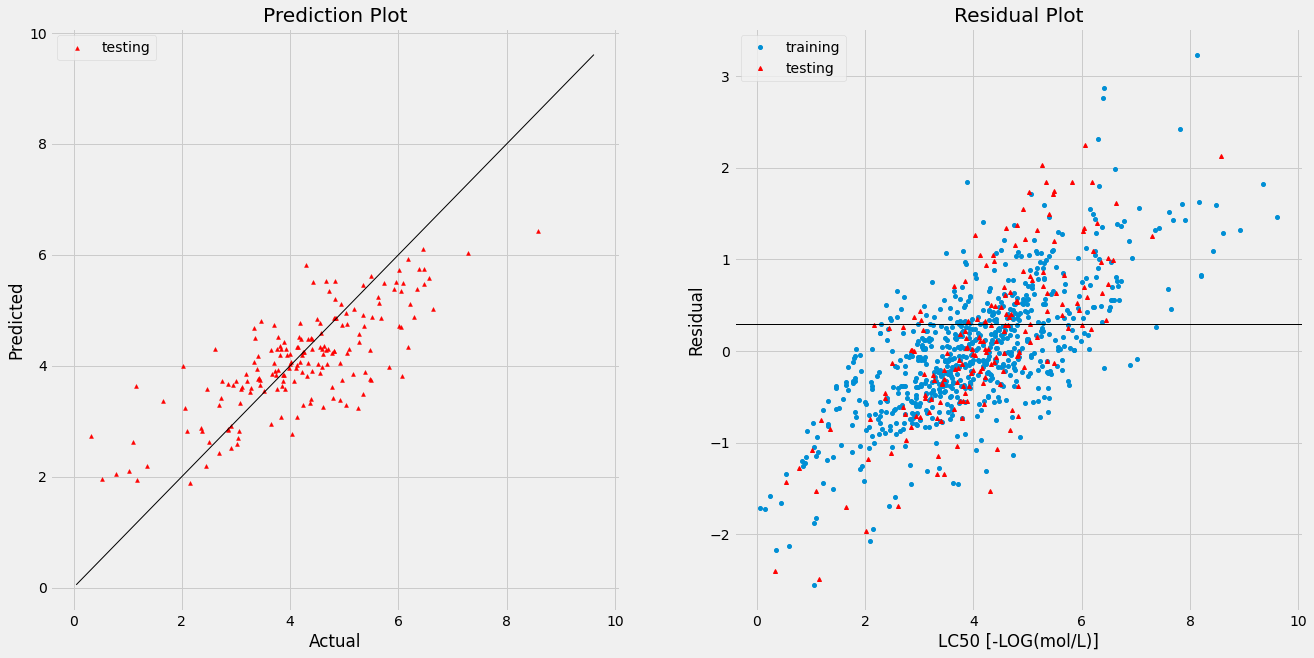

In [71]:
residual_train = y_train - rf_train_pred
residual_test = y_test - rf_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, rf_train_pred, s=15, label='training')
ax1.scatter(y_test, rf_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

**BAYESIAN RIDGE REGRESSOR**

In [72]:
from sklearn.linear_model import BayesianRidge

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=77)

In [74]:
start_time=time.time()
Bayesian=BayesianRidge(n_iter=5000).fit(X_train,y_train)
training_time_bayesian=time.time()-start_time

In [75]:
Bayesian_train_rscore=Bayesian.score(X_train,y_train)
Bayesian_train_pred=Bayesian.predict(X_train)
Bayesian_train_rmse=np.sqrt(mean_squared_error(y_train,Bayesian_train_pred))

In [76]:
print("R squared for Training data: ",Bayesian_train_rscore)
print("Root Mean Squared Error for Training data: ", Bayesian_train_rmse)

R squared for Training data:  0.5964265737184122
Root Mean Squared Error for Training data:  0.9202046289077245


In [77]:
Bayesian_test_rscore=Bayesian.score(X_test,y_test)
start_time2=time.time()
Bayesian_test_pred=Bayesian.predict(X_test)
testing_time_bayesian=time.time()-start_time2
Bayesian_test_rmse=np.sqrt(mean_squared_error(y_test,Bayesian_test_pred))
Bayesian_test_mae=mean_absolute_error(y_test,Bayesian_test_pred)

In [78]:
print("R squared for Testing data: ",Bayesian_test_rscore)
print("Root Mean Squared Error for Testing data: ", Bayesian_test_rmse)
print("Mean Absolute Error for Testing data: ", Bayesian_test_mae)

R squared for Testing data:  0.4890448703639477
Root Mean Squared Error for Testing data:  1.053331384291572
Mean Absolute Error for Testing data:  0.7771762536365512


In [79]:
def BAYESIAN_RIDGE():
  return {'Regressor Model':'Bayesian Ridge Regressor',
          'Predictions':Bayesian_test_pred,
          'R Squared': Bayesian_test_rscore,
          'Mean Absolute Error':Bayesian_test_mae,
          'Root Mean Squared Error':Bayesian_test_rmse,
          'Training Time': training_time_bayesian,
          'Prediction Time':testing_time_bayesian}

In [80]:
def test(n):
    x=Bayesian.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

The slowest run took 6.94 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 61.5 µs per loop


In [81]:
def value(n):
    x=Bayesian.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

3.906289940324392

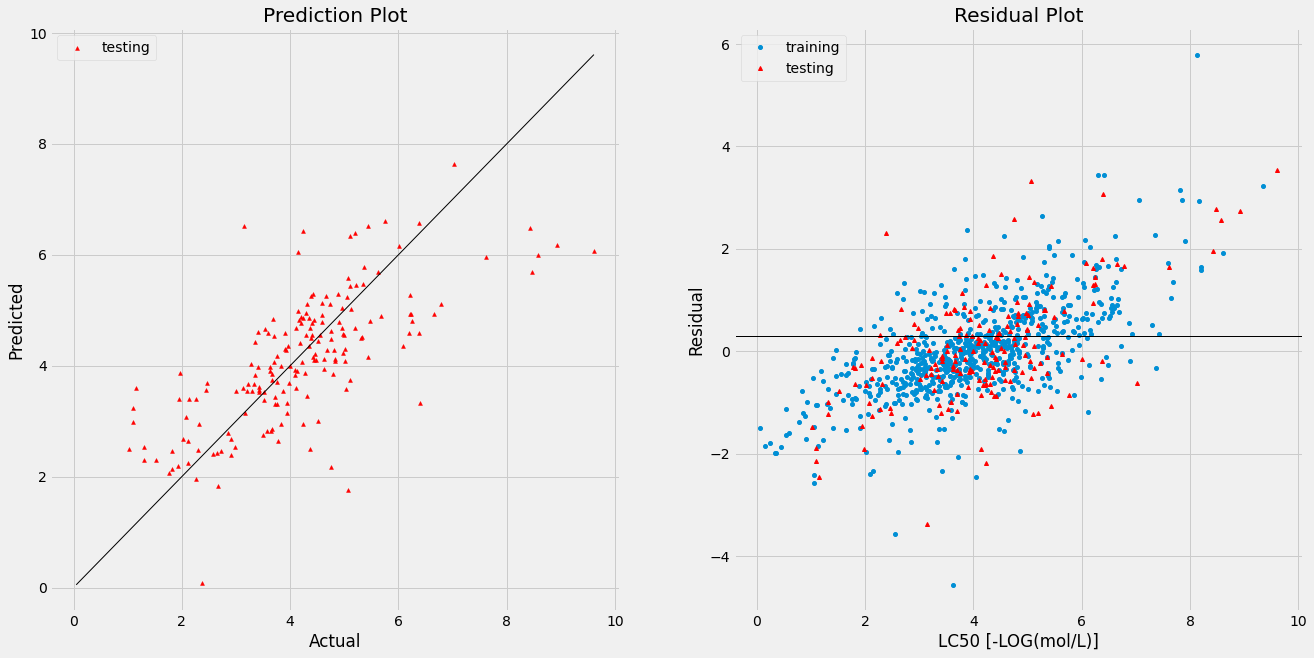

In [82]:
residual_train = y_train - Bayesian_train_pred
residual_test = y_test - Bayesian_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, Bayesian_train_pred, s=15, label='training')
ax1.scatter(y_test, Bayesian_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

In [83]:
models={}

In [84]:
models[1]=BAYESIAN_RIDGE()
models[2]=RF()
models[3]=SVM()
models[4]=XGB()
models[5]=MLR()
models[6]=KNN()

In [85]:
models

{1: {'Mean Absolute Error': 0.7771762536365512,
  'Prediction Time': 0.0003383159637451172,
  'Predictions': array([5.69420839, 2.14352465, 3.83178445, 3.52209419, 4.5123073 ,
         6.15811652, 2.54025955, 4.06222153, 4.22179137, 3.15251025,
         2.49217009, 4.60738019, 2.75445169, 3.59300915, 2.67254261,
         6.51130888, 2.6431392 , 6.00448657, 4.67536677, 3.32015859,
         4.90629901, 3.99539013, 7.63411953, 3.9850567 , 4.27598838,
         3.85184547, 4.20463301, 5.24097216, 4.14914058, 4.1711541 ,
         3.58906003, 2.50047462, 3.39582234, 4.94836085, 3.5457251 ,
         3.52203366, 3.66939171, 6.42993896, 3.8426746 , 2.41438809,
         4.79375078, 3.83119954, 5.69032893, 3.39582234, 4.82283486,
         2.45989885, 2.46749695, 2.19285581, 3.56156851, 4.92799012,
         3.43272931, 5.13295855, 4.81429632, 3.68576661, 4.06396687,
         4.93967871, 4.58817727, 2.94633764, 4.08020937, 4.03739848,
         5.25440311, 3.31538813, 4.58385649, 4.50420905, 4.356485

In [86]:
model_table=pd.DataFrame.from_dict(models,orient='index')
model_table

,Regressor Model,Predictions,R Squared,Mean Absolute Error,Root Mean Squared Error,Training Time,Prediction Time
1,Bayesian Ridge Regressor,"[5.694208385724651, 2.143524653765366, 3.83178...",0.489045,0.777176,1.053331,0.004472,0.000338
2,Random Forest Regressor,"[3.7259880202512754, 3.978390209646605, 4.1981...",0.580618,0.665948,0.864900,0.161972,0.009858
3,SVM Regressor,"[4.8212482490926565, 4.724583213353259, 4.5263...",0.591243,0.640375,0.944881,0.044510,0.007201
4,XGBoost,"[5.0902276, 4.100067, 3.7793908, 4.203609, 4.2...",0.617693,0.704721,0.986293,0.682989,0.002744
5,Multiple Linear Regression,"[4.02795728769571, 4.7528540949779705, 4.25527...",0.513622,0.670218,1.005929,0.030525,0.000748
6,KNN,"[4.154999999999999, 6.3100000000000005, 4.8, 5...",0.505028,0.769890,1.071169,0.444947,0.003314


In [87]:
names=['Bayesian Ridge','Random Forest','SVM ','XGBoost','MLR','KNN']
rmses=[i for i in model_table['Root Mean Squared Error']]
color=['red','yellow','blue','green','pink','black']

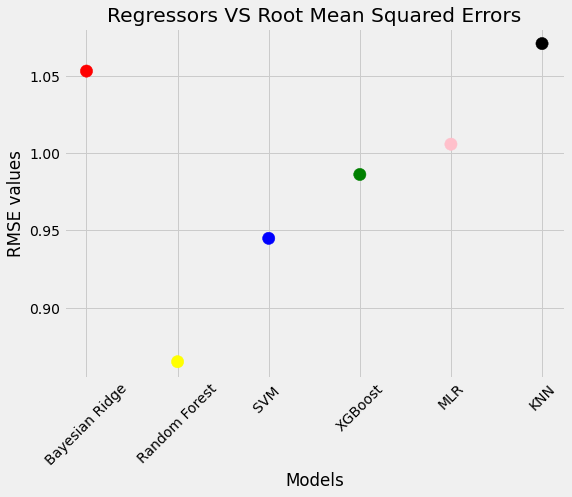

In [88]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(names, 
            rmses,
            s=150,
            c=color)
plt.xlabel('Models')
plt.xticks(rotation='45')
plt.ylabel('RMSE values')
plt.title('Regressors VS Root Mean Squared Errors')
plt.show()

In [89]:
names=['Bayesian Ridge','Random Forest','SVM ','XGBoost','MLR','KNN']
preds=[i for i in model_table['Prediction Time']]
color=['red','yellow','blue','green','pink','black']

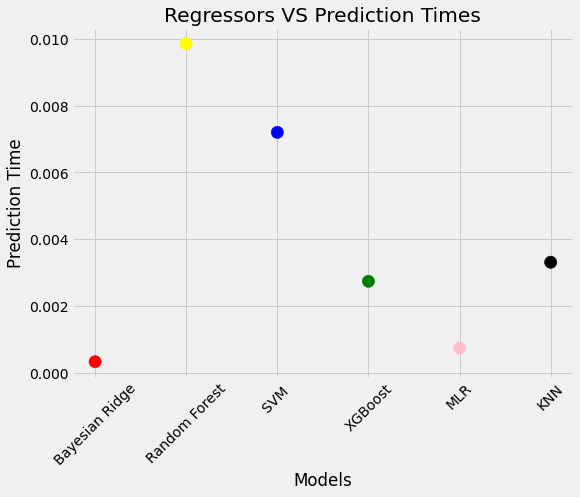

In [90]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(names, 
            preds,
            s=150,
            c=color)
plt.xlabel('Models')
plt.xticks(rotation='45')
plt.ylabel('Prediction Time')
plt.title('Regressors VS Prediction Times')
plt.show()

In [91]:
model_table.to_csv('models_final.csv')

In [92]:
filename = 'rf.sav'
pickle.dump(rf, open(filename, 'wb'))

Hence, after training and testing 6 different Regressor models we see that Random Forest Regressor performs the best with RMSE value of 0.866439

Since, the dataset is a science dataset, we can expect high RMSE values and low R Squared Accuracy Metrics since we are predicting a biological phenomena such as toxicity using chemical molecular descriptors instead of a marketing or sales prediction task. 

In [93]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print(result)

0.7443493425281082
